In [28]:
import pandas as pd 
import seaborn as sns
import numpy as mp
import matplotlib.pyplot as plt
import scipy.stats as stats

In [29]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [30]:
data=pd.read_csv("C:/Users/xtt/Desktop/第二学期/MMO/All Categories.csv")

In [31]:
data.head()

,Rank,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for
0,1,Meesho: Online Shopping App,Meesho,Shopping,15 MB,4.4,15L,10Cr+,3+
1,2,Shopee: Online Shopping,Shopee,Shopping,68 MB,4.1,76T,1Cr+,3+
2,3,Instagram,Instagram,Social,41 MB,4.3,13Cr,100Cr+,12+
3,4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,36 MB,4.1,1Cr,100Cr+,3+
4,5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,12 MB,4.5,41T,1Cr+,3+


In [32]:
data.isnull().sum()

Rank           0
Name           0
Developer      0
Category       0
Size           0
Star Rating    1
Reviews        1
Downloads      0
Rated for      0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         600 non-null    int64  
 1   Name         600 non-null    object 
 2   Developer    600 non-null    object 
 3   Category     600 non-null    object 
 4   Size         600 non-null    object 
 5   Star Rating  599 non-null    float64
 6   Reviews      599 non-null    object 
 7   Downloads    600 non-null    object 
 8   Rated for    600 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 42.3+ KB


In [34]:
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_regression

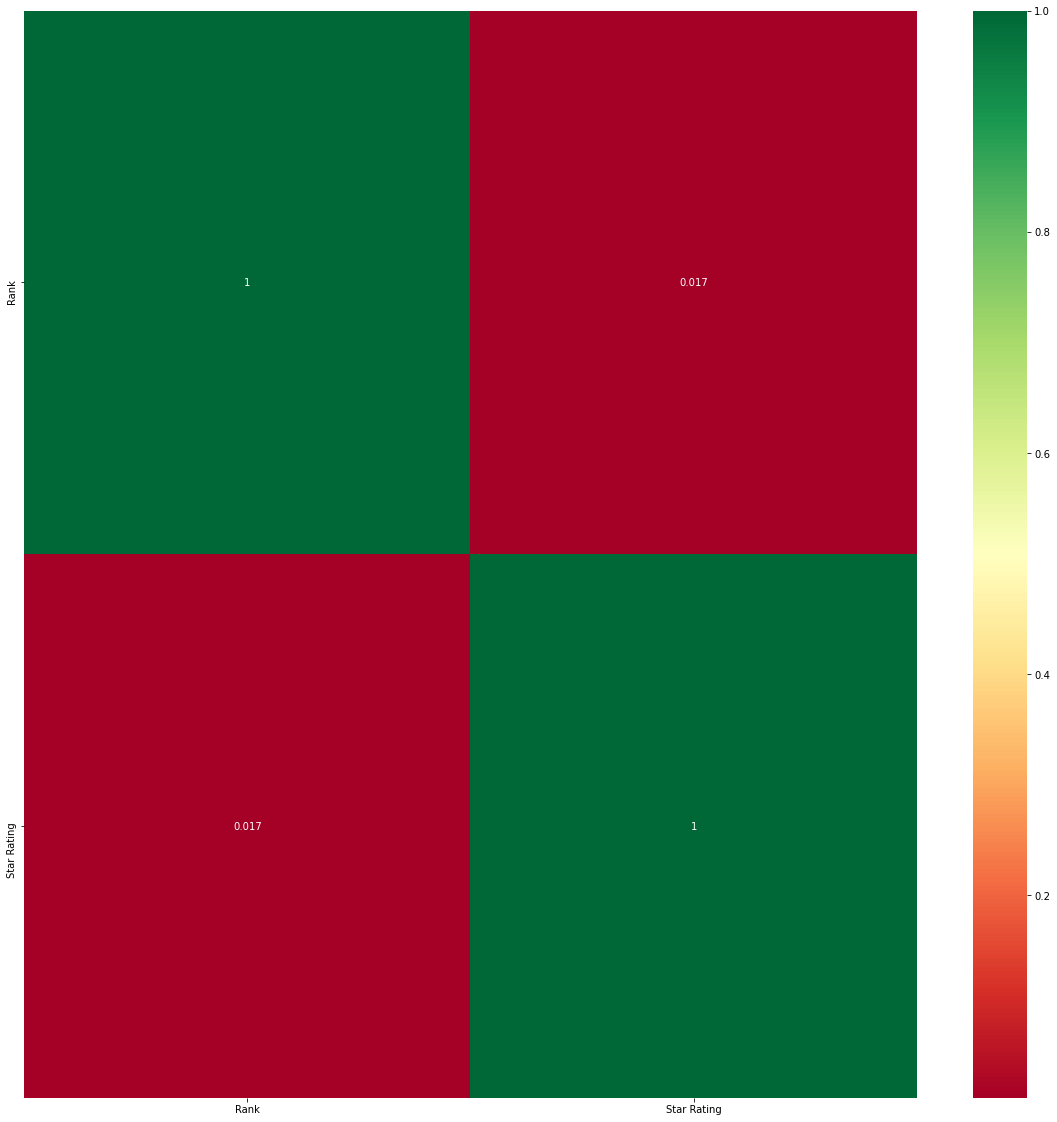

In [35]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Оптимальное значение λ = 8.472135811722177


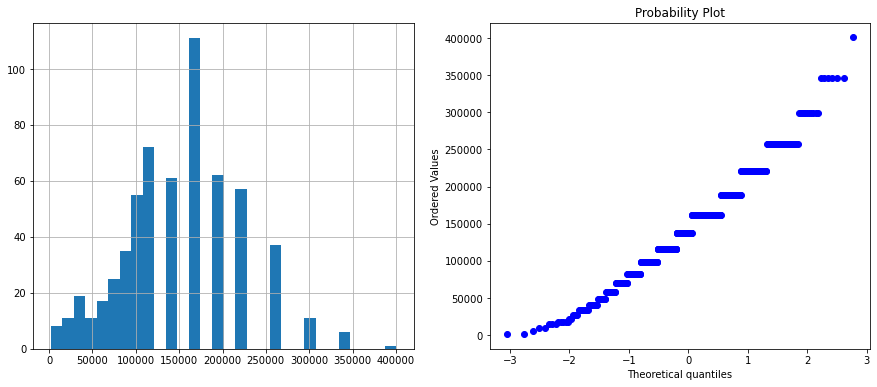

In [38]:
# Необходимо преобразовать данные к действительному типу
data['Star Rating_yeojohnson'], param = stats.yeojohnson(data['Star Rating']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Star Rating_yeojohnson')

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [51]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [52]:
boston = load_boston()
boston_X = boston.data
boston_y = boston.target
boston_feature_names = boston['feature_names']
boston_x_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

Text(0, 0.5, 'Взаимная информация')

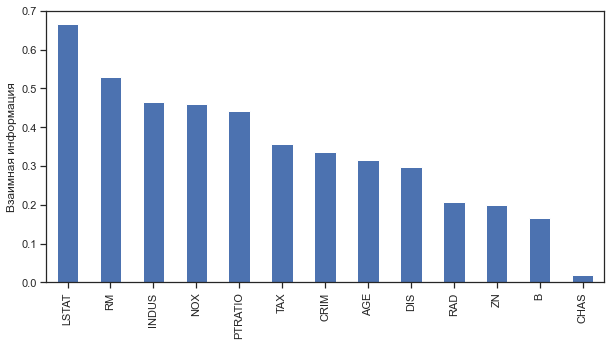

In [53]:
mi = mutual_info_regression(boston_X, boston_y)
mi = pd.Series(mi)
mi.index = boston_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [54]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(boston_X, boston_y)

list(zip(boston_feature_names, sel_mi.get_support()))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', True),
 ('CHAS', False),
 ('NOX', True),
 ('RM', True),
 ('AGE', False),
 ('DIS', False),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', True),
 ('B', False),
 ('LSTAT', True)]

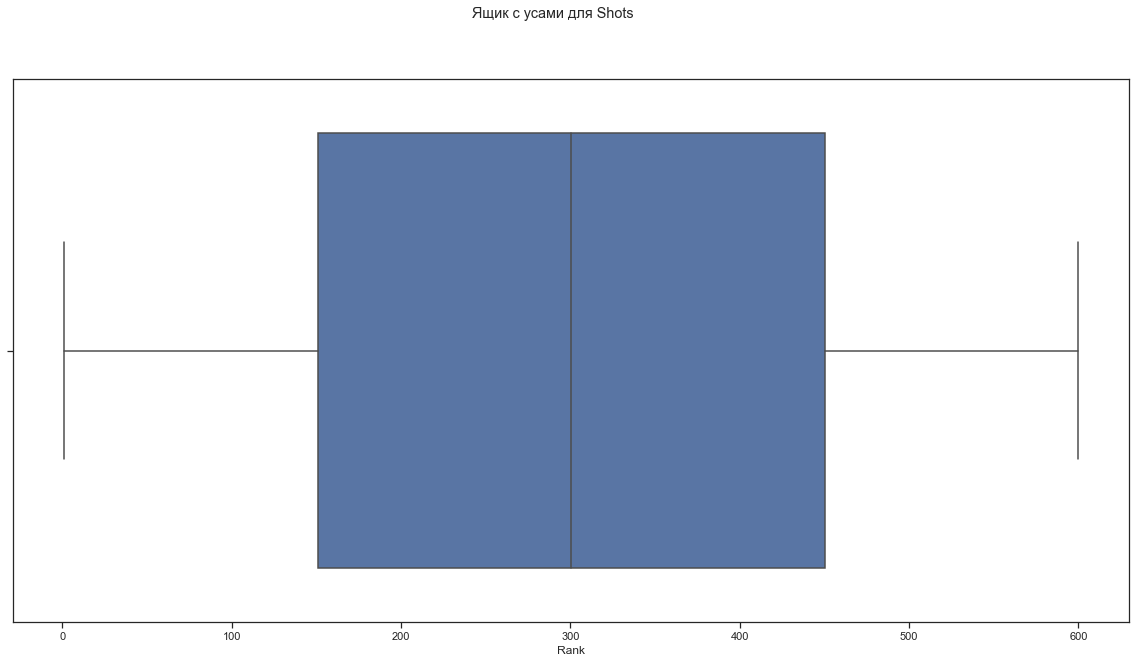

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=data['Rank'])
fig.suptitle('Ящик с усами для Shots')
plt.show()